<a href="https://colab.research.google.com/github/Chiebukar/Machine-Learning/blob/main/regression/disaster_tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# create directory and move kaggle.json to directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# download dataset
!kaggle competitions download -c nlp-getting-started

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# View downloaded files
!ls -d $PWD/*

'/content/kaggle (1).json'	  /content/test.csv
 /content/kaggle.json		  /content/train.csv
 /content/sample_data		  /content/weights.best.hdf5
 /content/sample_submission.csv


In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_data.shape, test_data.shape

((7613, 5), (3263, 4))

In [ ]:
train_data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [ ]:
train_data['target'].unique()

array([1, 0])

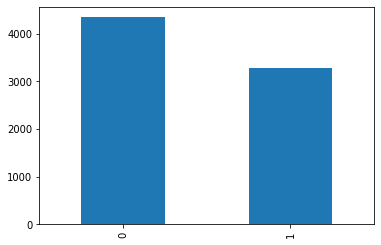

In [ ]:
train_data['target'].value_counts().plot(kind='bar')

In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_features = train_data['text']
train_label = train_data['target']
test_features = test_data['text']

In [ ]:
# get count of unique words in input
def get_num_of_words(data, text_column= 'input'):
  results = Counter()
  data[text_column].str.lower().str.split().apply(results.update)
  return len(results)

In [ ]:
from collections import Counter

In [ ]:
NUM_WORDS = get_num_of_words(train_data, 'text')
NUM_WORDS

27983

In [ ]:
# get maximum length of text
def get_max_len(data, text_column='input'):
   max_len = data[text_column].map(len).max()
   return max_len

In [ ]:
MAX_LEN = get_max_len(train_data, 'text')
MAX_LEN

157

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def tokenize(data, NUM_WORDS, MAX_LEN, fit_data=train_features):
  tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='UNK')
  tokenizer.fit_on_texts(fit_data)
  sequences = tokenizer.texts_to_sequences(data)
  data = pad_sequences(sequences,maxlen=MAX_LEN, padding='post')
  return np.array(data)

In [ ]:
train_features = tokenize(train_features, 25000, 150)
test_features = tokenize(test_features, 25000, 150)

In [ ]:
test_features[0]

array([  35,  914,    6, 1952,  131,   93,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0], d

In [ ]:
train_label[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2)
y_train[:5], y_val[:5]

(7277    0
 6081    0
 7491    1
 745     0
 2954    0
 Name: target, dtype: int64, 719     1
 1923    0
 2365    0
 5506    1
 5628    1
 Name: target, dtype: int64)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  model.add(Embedding(25000, 8))
  model.add(Conv1D(4, 3, activation='relu'))
  model.add(MaxPooling1D())
  
  model.add(Conv1D(8, 3, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
  model.add(GlobalMaxPooling1D())

  model.add(Dense(4, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
  model.add(Dropout(0.25))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

  return  model

In [ ]:
cnn_model = build_model()
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           200000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 4)           100       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 4)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 8)           104       
_________________________________________________________________
global_max_pooling1d (Global (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 4)                 36        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0

In [ ]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose = 1, factor=0.2, min_lr= 1e-7)

filepath = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath,  monitor ='val_acc', verbose = 1, save_best_only = True, mode='max')

In [ ]:
history = cnn_model.fit(x_train, y_train, epochs= 25, validation_data = (x_val, y_val), 
                    batch_size = 8, callbacks = [learn_control, checkpoint])

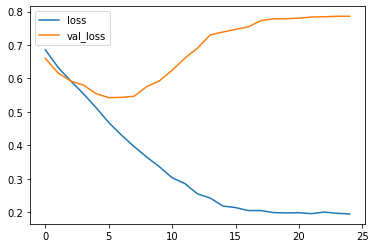

In [ ]:
history_df = pd.DataFrame(history.history)

history_df[['loss', 'val_loss']].plot()

In [ ]:
cnn_model.load_weights('weights.best.hdf5')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost  import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier

In [ ]:
config = {
    'support vector machine' : {
        'model' : SVC(),
        'params': {
            'C': [1, 2, 4, 6, 8],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
   
    'K neighbors classifier' : {
        'model' : KNeighborsClassifier(),
        'params': {
             'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'kneighborsclassifier__metric': ['minkowski', 'precomputed'],
             'kneighborsclassifier__n_neighbors': [1, 2, 5, 7, 10],
             'kneighborsclassifier__weights':['uniform', 'distance']
        }       
    },
      
      'random forest classifier' : {
         'model' : RandomForestClassifier(),
         'params': {
             'randomforestclassifier__criterion' : ['gini', 'entropy'],
             'randomforestclassifier__n_estimators': [1,5,10],
              'randomforestclassifier__warm_start' : [True, False]    
        }
     },
         'logistic regression' : {
         'model' : LogisticRegression(),
         'params': {
              'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'logisticregression__C' : [1, 5, 10],
             'logisticregression__fit_intercept' : [True, False],
             'logisticregression__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'logisticregression__warm_start'  : [True, False] 
        }
     },
    }
    

In [ ]:
def get_best_model():
  scores = []
  best_estimator = {}
  for model_name, model_params in config.items():
      print('processing data with {}'.format(model_name))
      clf = GridSearchCV(model_params['model'], model_params['params'], cv = 4, return_train_score= False)
      clf.fit(x_train,y_train)
      scores.append({
              'model' : model_name,
              'best_score' : clf.best_score_,
              'best_params' : clf.best_params_
          })
      best_estimator[model_name] = clf.best_estimator_
  return best_estimator, pd.DataFrame(scores)

Blending Ensembling

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
kf = KFold(n_splits = 10, random_state = 0, shuffle = True)

In [ ]:
def get_score(model):
  score = cross_val_score(model, x_train, y_train, scoring= 'accuracy', cv= kf)
  return score.mean()

In [ ]:
baseline_models = {'adaboost' :AdaBoostClassifier(),
          'gdboost': GradientBoostingClassifier(),
          'baging_clf': BaggingClassifier(),
          'xgboost': XGBClassifier() ,
          'catboost': CatBoostClassifier(),
          'SVM' : SVC(),
          'random_forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier(),
          'Log_Regression': LogisticRegression(),
          'stacking_clf': StackingClassifier(classifiers= (SVC(), LogisticRegression(), KNeighborsClassifier()),
                                                           meta_classifier = LogisticRegression(),
                                                           use_features_in_secondary = True)
          }

In [ ]:
 score = []
 for model_name, model in baseline_models.items():
   print('getting score for {}'.format(model_name))
   model_score = get_score(model)
   score.append({
                  'model' : model_name,
                  'base_score': model_score
                 })

In [ ]:
scores_df = pd.DataFrame(score)
scores_df

,model,base_score
0,adaboost,0.646305
1,gdboost,0.663547
2,baging_clf,0.655008
3,xgboost,0.662726
4,catboost,0.681609
5,SVM,0.608374
6,random_forest,0.688177
7,KNN,0.596223
8,Log_Regression,0.595402
9,stacking_clf,0.592611


In [ ]:
scores_df.sort_values(by= 'base_score', ascending=False, ignore_index=True).head(4)

,model,base_score
0,random_forest,0.688177
1,catboost,0.681609
2,gdboost,0.663547
3,xgboost,0.662726


In [ ]:
model1 = cnn_model
val_pred1 = model1.predict(x_val).round()
test_pred1 = model1.predict(test_features).round()
df_val_pred1 = pd.DataFrame(val_pred1).astype('int')
df_test_pred1 = pd.DataFrame(test_pred1).astype('int')


model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
val_pred2 = model2.predict(x_val)
test_pred2 = model2.predict(test_features)
df_val_pred2 = pd.DataFrame(val_pred2)
df_test_pred2 = pd.DataFrame(test_pred2)

model3 = CatBoostClassifier()
model3.fit(x_train, y_train)
val_pred3 = model3.predict(x_val)
test_pred3 = model3.predict(test_features)
df_val_pred3 = pd.DataFrame(val_pred3)
df_test_pred3 = pd.DataFrame(test_pred3)

model4 = GradientBoostingClassifier()
model4.fit(x_train, y_train)
val_pred4 = model4.predict(x_val)
test_pred4 = model4.predict(test_features)
df_val_pred4 = pd.DataFrame(val_pred4)
df_test_pred4 = pd.DataFrame(test_pred4)

model5 = XGBClassifier()
model5.fit(x_train, y_train)
val_pred5 = model5.predict(x_val)
test_pred5 = model5.predict(test_features)
df_val_pred5 = pd.DataFrame(val_pred5)
df_test_pred5 = pd.DataFrame(test_pred5)

In [ ]:
val_df= pd.concat([df_val_pred1, df_val_pred2, df_val_pred3, df_val_pred4, df_val_pred5], axis= 1)
val_df.columns = ['CNN', 'RD_forest', 'Catboost', 'GDboost', 'XGB']
val_df.head(5)

,CNN,RD_forest,Catboost,GDboost,XGB
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,1,1,1
4,1,1,1,1,0


In [ ]:
test_df= pd.concat([df_test_pred1, df_test_pred2, df_test_pred3, df_test_pred4, df_test_pred5], axis= 1)
test_df.columns = ['CNN', 'RD_forest', 'Catboost', 'GDboost', 'XGB']
test_df.head(5)

,CNN,RD_forest,Catboost,GDboost,XGB
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,1,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(val_df, y_val)
lr.score(val_df, y_val)

0.7787261982928431

In [ ]:
test_prediction = lr.predict(test_df)
test_prediction[:5]

array([0, 1, 0, 0, 1])

In [ ]:
submission = pd.DataFrame(test_data['id'], columns= ['id'])
submission['target'] = test_prediction
submission.head()

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,1


In [ ]:
submission.to_csv('submission.csv', index= False, header = True)

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from keras.layers import LSTM, Bidirectional

In [ ]:
x_train.shape

(6090, 150)

In [ ]:
learn_control = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose = 1, factor=0.2, min_lr= 1e-7)

filepath = 'weights.best.hdf5'
checkpoint = ModelCheckpoint(filepath,  monitor ='val_acc', verbose = 1, save_best_only = True, mode='max')

In [ ]:
history = cnn_model.fit(x_train, y_train, epochs= 25, validation_data = (x_val, y_val), 
                    batch_size = 8, callbacks = [learn_control, checkpoint])